<a href="https://colab.research.google.com/github/Tahis-Fzs/Agro/blob/main/Identifying_Medical_Diagnoses_and_Treatable_Diseases_by_Image_Based_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Set path to your dataset inside drive
data_dir = "/content/drive/MyDrive/AI Lab/OCT2017 /train"

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [10]:
# First, run this cell to mount your drive
from google.colab import drive
drive.mount('/content/drive')

# Second, run this cell to define data_dir
# Set path to your dataset inside drive
data_dir = "/content/drive/MyDrive/AI Lab/OCT2017 /train"

# Third, run this cell to import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Finally, run this cell which uses data_dir
img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    data_dir, # This now has a value
    target_size=img_size,
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

val_gen = datagen.flow_from_directory(
    data_dir, # This now has a value
    target_size=img_size,
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 6967 images belonging to 4 classes.
Found 1741 images belonging to 4 classes.


In [5]:
base_model = EfficientNetB0(include_top=False, input_shape=(224, 224, 3), weights='imagenet')
base_model.trainable = False  # Freeze base model

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,214,055 (16.08 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [7]:
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True)

history = model.fit(
    train_gen,
    epochs=3,
    validation_data=val_gen,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/3
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 1.0000 - loss: 3.3268e-08

218/218 ━━━━━━━━━━━━━━━━━━━━ 927s 4s/step - accuracy: 1.0000 - loss: 3.3302e-08 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/3
218/218 ━━━━━━━━━━━━━━━━━━━━ 909s 4s/step - accuracy: 1.0000 - loss: 4.4488e-08 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/3
218/218 ━━━━━━━━━━━━━━━━━━━━ 917s 4s/step - accuracy: 1.0000 - loss: 5.9598e-08 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


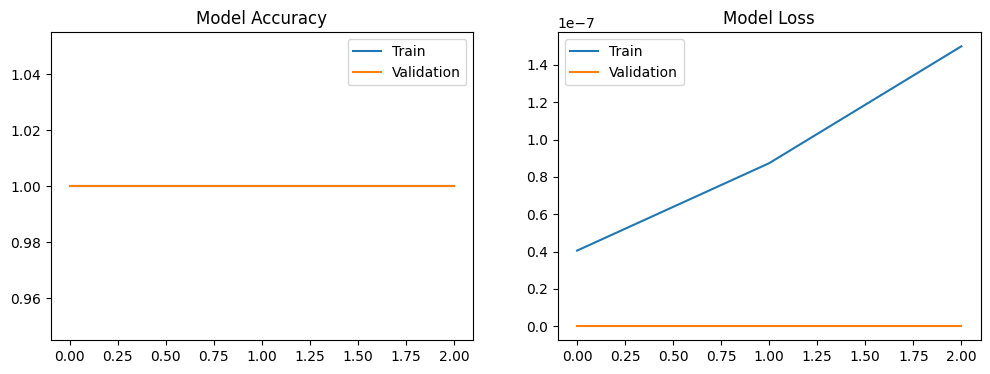

In [8]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.legend()

plt.show()

55/55 ━━━━━━━━━━━━━━━━━━━━ 184s 3s/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


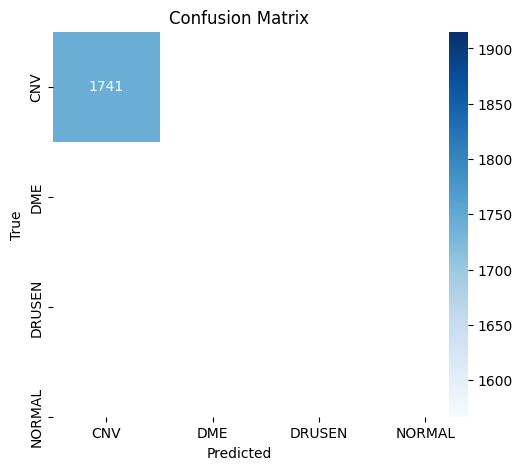

ValueError: Number of classes, 1, does not match size of target_names, 4. Try specifying the labels parameter

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np # Import numpy

# Get predictions
val_gen.reset()
# Predict on the entire validation set by specifying the number of steps
# The number of steps is the total number of samples divided by the batch size
steps = np.ceil(val_gen.samples / val_gen.batch_size)
# Convert steps to an integer
steps = int(steps)
preds = model.predict(val_gen, steps=steps)
y_pred = np.argmax(preds, axis=1)

# It is important to reset the generator *before* getting the true labels
# to ensure the order matches the predictions.
val_gen.reset()
y_true = val_gen.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=val_gen.class_indices.keys(),
            yticklabels=val_gen.class_indices.keys(), cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print(classification_report(y_true, y_pred, target_names=list(val_gen.class_indices.keys())))

In [12]:
test_dir = "/content/drive/MyDrive/AI Lab/OCT2017 /test"

test_gen = datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 968 images belonging to 4 classes.


In [14]:
base_model = EfficientNetB0(include_top=False, input_shape=(224, 224, 3), weights='imagenet')
base_model.trainable = False  # Freeze base model

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,214,055 (16.08 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict on test data
y_probs = model.predict(test_gen)        # probabilities
y_pred = y_probs.argmax(axis=1)          # predicted class index
y_true = test_gen.classes                # actual class labels
class_names = list(test_gen.class_indices.keys())  # class names for labeling

# Print evaluation report
print(classification_report(y_true, y_pred, target_names=class_names))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 265s 9s/step
              precision    recall  f1-score   support

         CNV       0.00      0.00      0.00       242
         DME       0.00      0.00      0.00       242
      DRUSEN       0.25      1.00      0.40       242
      NORMAL       0.00      0.00      0.00       242

    accuracy                           0.25       968
   macro avg       0.06      0.25      0.10       968
weighted avg       0.06      0.25      0.10       968



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [4]:
# Finally, run this cell which uses data_dir
img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    data_dir, # This now has a value
    target_size=img_size,
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

val_gen = datagen.flow_from_directory(
    data_dir, # This now has a value
    target_size=img_size,
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 776 images belonging to 4 classes.
Found 192 images belonging to 4 classes.


In [6]:
import numpy as np
import pandas as pd

# Count per class in training set
print("Train class distribution:")
pd.Series(train_gen.classes).value_counts().sort_index()

Train class distribution:


,count
0,194
1,194
2,194
3,194


In [12]:
import os

test_dir = "/content/drive/MyDrive/AI Lab/OCT2017 /test"  # You gave this

class_counts = {}
for class_name in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_name)
    if os.path.isdir(class_path):
        num_images = len([f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
        class_counts[class_name] = num_images

print("Test images per class:", class_counts)

Test images per class: {'NORMAL': 242, 'DRUSEN': 242, 'DME': 242, 'CNV': 242}


In [13]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load base model
base_model = MobileNetV2(include_top=False, input_shape=(224, 224, 3), weights='imagenet')
base_model.trainable = False  # Freeze base

# Custom classifier head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile and train
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.2759 - loss: 1.7356 - val_accuracy: 0.5469 - val_loss: 1.1139
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.4071 - loss: 1.2731 - val_accuracy: 0.7083 - val_loss: 0.8594
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.5755 - loss: 0.9890 - val_accuracy: 0.8177 - val_loss: 0.6881
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.6530 - loss: 0.8528 - val_accuracy: 0.8229 - val_loss: 0.5712
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.7285 - loss: 0.7359 - val_accuracy: 0.7865 - val_loss: 0.5629
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.7266 - loss: 0.7252 - val_accuracy: 0.8490 - val_loss: 0.4918
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.7626 - loss: 0.6465 - val_accuracy: 0.8490 - val_loss: 0.4689
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.7955 

In [17]:
img_size = (224, 224)
batch_size = 32
data_dir = "/content/drive/MyDrive/AI Lab/OCT2017 /test"  # Confirmed path

from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(
    directory=data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 968 images belonging to 4 classes.


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 776 images belonging to 4 classes.
Found 192 images belonging to 4 classes.


In [19]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

labels = train_gen.classes
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(labels), y=labels)
class_weights_dict = dict(enumerate(class_weights))

# Then pass to model.fit
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    class_weight=class_weights_dict
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 0.8364 - loss: 0.4700 - val_accuracy: 0.8906 - val_loss: 0.3537
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.8479 - loss: 0.4445 - val_accuracy: 0.8802 - val_loss: 0.3656
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.8389 - loss: 0.4193 - val_accuracy: 0.8906 - val_loss: 0.3138
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.8301 - loss: 0.4418 - val_accuracy: 0.8490 - val_loss: 0.3523
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.8330 - loss: 0.4442 - val_accuracy: 0.8646 - val_loss: 0.3583
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8485 - loss: 0.3938 - val_accuracy: 0.8698 - val_loss: 0.3503
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.8608 - loss: 0.3606 - val_accuracy: 0.9010 - val_loss: 0.2805
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.8479 - loss: 0.3957 - val_accuracy: 0.9010 - val_loss:

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict on test set
y_probs = model.predict(test_gen)
y_pred = y_probs.argmax(axis=1)
y_true = test_gen.classes
class_names = list(test_gen.class_indices.keys())

# Print evaluation metrics
print(classification_report(y_true, y_pred, target_names=class_names))

31/31 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step
              precision    recall  f1-score   support

         CNV       0.97      0.81      0.88       242
         DME       0.92      0.90      0.91       242
      DRUSEN       0.80      0.96      0.87       242
      NORMAL       0.96      0.93      0.94       242

    accuracy                           0.90       968
   macro avg       0.91      0.90      0.90       968
weighted avg       0.91      0.90      0.90       968



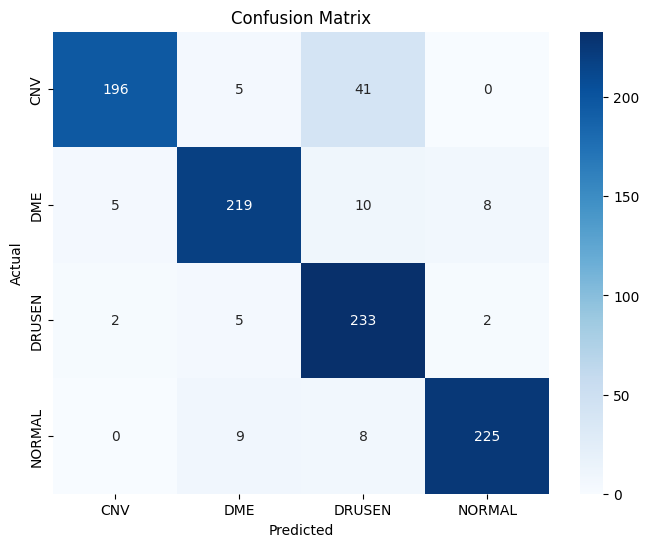

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

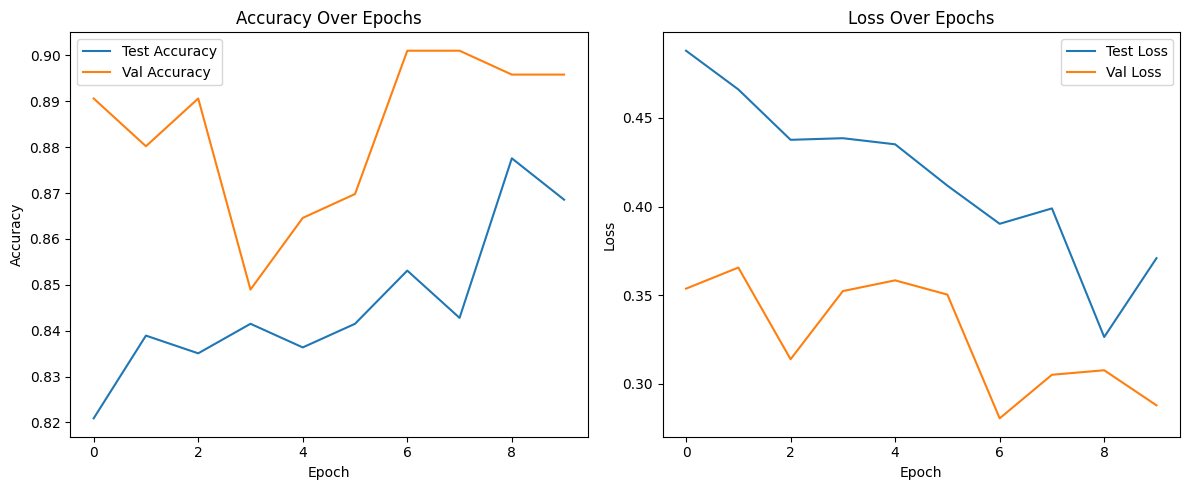

In [25]:
# Plot accuracy and loss curves
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Test Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Test Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_data_dir = "/content/drive/MyDrive/AI Lab/OCT2017 /test"  # update if needed

test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(
    directory=test_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 968 images belonging to 4 classes.


In [27]:
def print_class_distribution(generator, name="Dataset"):
    print(f"Class distribution for {name}:")
    class_counts = {}
    for class_label in generator.class_indices.keys():
        class_counts[class_label] = 0

    # generator.classes is a numpy array of encoded class indices for all samples
    import numpy as np
    for class_index in generator.classes:
        class_name = list(generator.class_indices.keys())[class_index]
        class_counts[class_name] += 1

    for class_name, count in class_counts.items():
        print(f"  {class_name}: {count} images")
    print(f"Total samples: {generator.samples}\n")

# Call this for each generator:
print_class_distribution(train_gen, "Training set")
print_class_distribution(val_gen, "Validation set")
print_class_distribution(test_gen, "Test set")

Class distribution for Training set:
  CNV: 194 images
  DME: 194 images
  DRUSEN: 194 images
  NORMAL: 194 images
Total samples: 776

Class distribution for Validation set:
  CNV: 48 images
  DME: 48 images
  DRUSEN: 48 images
  NORMAL: 48 images
Total samples: 192

Class distribution for Test set:
  CNV: 242 images
  DME: 242 images
  DRUSEN: 242 images
  NORMAL: 242 images
Total samples: 968



In [28]:
print(train_gen.class_indices)  # shows class names and their encoded labels
print({k: v for k, v in train_gen.class_indices.items()})
print(f"Number of training samples: {train_gen.samples}")

{'CNV': 0, 'DME': 1, 'DRUSEN': 2, 'NORMAL': 3}
{'CNV': 0, 'DME': 1, 'DRUSEN': 2, 'NORMAL': 3}
Number of training samples: 776


In [29]:
test_loss, test_acc = model.evaluate(test_gen)
print(f"Test accuracy: {test_acc}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8578 - loss: 0.3926
Test accuracy: 0.9018595218658447


In [34]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

In [41]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap + tf.keras.backend.epsilon())
    return heatmap.numpy()

In [42]:
def display_gradcam(img_path, model, class_names):
    # 1. Auto-detect last conv layer
    last_conv_layer_name = None
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            last_conv_layer_name = layer.name
            break
    if not last_conv_layer_name:
        raise ValueError("No Conv2D layer found in the model.")

    print(f"Using last conv layer: {last_conv_layer_name}")

    # 2. Load and preprocess image
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.efficientnet.preprocess_input(img_array)

    # 3. Generate heatmap
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

    # 4. Overlay heatmap on original image
    img_orig = cv2.imread(img_path)
    img_orig = cv2.resize(img_orig, (224, 224))
    heatmap_resized = cv2.resize(heatmap, (224, 224))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img_orig, 0.6, heatmap_colored, 0.4, 0)

    # 5. Predict class
    preds = model.predict(img_array)
    pred_class = class_names[np.argmax(preds[0])]

    # 6. Plot
    plt.figure(figsize=(6, 6))
    plt.title(f"Predicted: {pred_class}")
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

Using last conv layer: Conv_1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


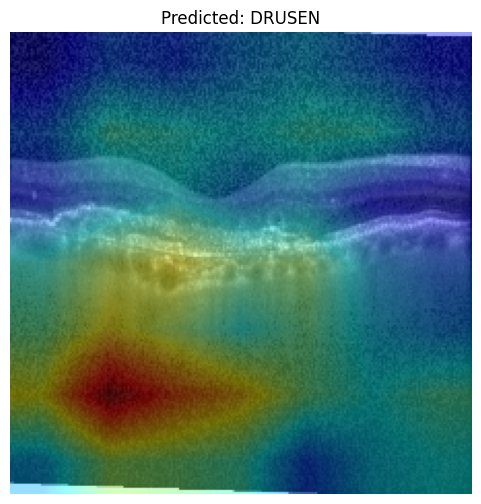

In [43]:
# Get class names
class_names = list(test_gen.class_indices.keys())

# Choose an image
img_path = test_gen.filepaths[0]  # or any path from test_gen.filepaths

# Display Grad-CAM
display_gradcam(img_path, model, class_names)

Using last conv layer: Conv_1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


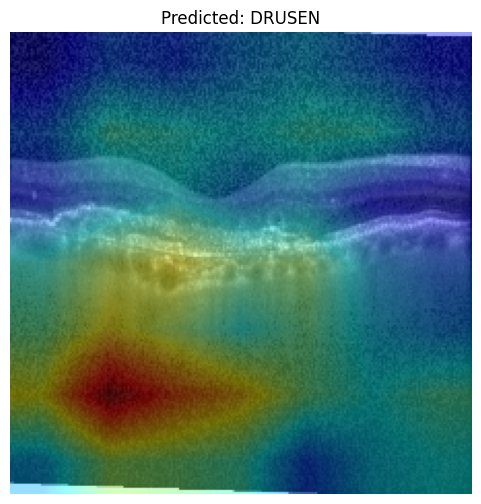

In [44]:
display_gradcam(img_path, model, class_names)